**What have done here:**
Predicted Next 7 days data using Support Vector Machine, Linear Regression, Deep Neural Network.

In [1]:
# Import Libraries
import pandas as pd
import math
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import tensorflow as tf
from tensorflow import keras

from tensorflow.keras import layers

from sklearn import preprocessing

from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split

from sklearn.svm import SVR
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.linear_model import LinearRegression

In [2]:
# Data loading
data = pd.read_csv('/kaggle/input/stock-price-forecast/ISCTR.IS (1).csv', parse_dates=True, index_col=0)

data = data.dropna()

data['High_Low_per'] = (data['High'] - data['Close']) / data['Close'] * 100
data['Per_change'] = (data['Open'] - data['Open']) / data['Close'] * 100
data = data[['Adj Close', 'High_Low_per', 'Per_change', 'Volume']]
label_col = 'Adj Close'

ceil_data = int(math.ceil(0.002*len(data)))
data['label'] = data[label_col].shift(-ceil_data)

X = data.drop(['label'], axis=1).values
X = preprocessing.scale(X)
X = X[:-ceil_data]

# Predict on next days
forecast = X[-ceil_data-7:-ceil_data]

y = data['label'].values

# Drop rows with missing values
data.dropna(inplace=True)

# Convert label column to numpy array
y = data['label'].values

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

# **Support Vector Machine**

In [3]:
svr = SVR(kernel='rbf', C=1000, gamma=0.1)
svr.fit(X_train, y_train)

# Predict the test data
prediction_svm = svr.predict(X_test)

# Predict the next 7 days of data
svm_next7days = svr.predict(forecast)

print('Predictions on Test Data:', prediction_svm)

Predictions on Test Data: [ 2.24439621  1.81334081  1.8021509   2.39902462  2.25572155  2.50206031
  2.78834657  1.67261504  1.75882566  2.43919395  2.4623171   2.02266198
  2.23965998  2.27882462  2.14833777  2.34387863  1.81648339  1.7854841
  1.73564609  8.49416896  1.8659568   2.44064919  5.94118986  2.61867174
  1.70961433  1.77310302  9.66333391  1.91099583  2.12159179  1.66663215
  2.85587476  3.08552468  1.70467248  2.15263017  2.36867517  1.9546291
  3.0273596   1.89776243  9.36377525  1.65466399  2.84360472  2.10743997
  1.87881108  2.89890779  1.76623399  2.52764278  1.69363225  1.77665382
  3.0273596   2.00349577  2.34109439  1.93662159  2.2986761   1.77574821
  2.16088778  1.94549192  1.60992404  2.03921419  2.43072329  2.38095797
  7.50240395  2.77344634  2.90438574  2.46987161  2.10505597  2.28272393
  2.93302021  2.10856603  4.92155469  2.38291711  2.86187857  2.11494362
  2.65974445  2.2635232   2.4558536   2.12545334  1.69145651  2.11177841
  2.28737576  1.80273187  2

In [4]:
# Prediction for next 7 days
print('Predictions for Next 7 Days:', svm_next7days)

Predictions for Next 7 Days: [11.63730134 10.07026864 10.5104963  10.95578145 10.21027758 10.88807739
  6.64614367]


# **Linear Regression**

In [5]:
lr = LinearRegression()
lr.fit(X_train, y_train)

lr_prediction = lr.predict(X_test)

# Predict the next 7 days of data
lr_next7days = lr.predict(forecast)

print('Predictions on Test Data:', lr_prediction)

Predictions on Test Data: [ 2.29596389  1.80912901  1.79761072  2.42323059  2.27787664  2.49395154
  2.82755922  1.7491494   1.74966901  2.42589617  2.49721592  1.98653042
  2.26047594  2.32997003  2.14739999  2.37438886  1.82043607  1.75817072
  1.73396074 10.13055105  1.76354147  2.46817586  5.98839496  2.6579461
  1.72738437  1.76131892  9.70906866  1.91487868  2.15166693  1.75011593
  2.88417714  3.10721477  1.71330897  2.16094594  2.35316207  1.98685059
  3.04828558  2.01248777  9.21086411  1.70352429  2.87562591  2.09754675
  1.89085236  2.9525515   1.69496286  2.55366744  1.69209629  1.75815005
  3.04828558  1.70997512  2.20565799  1.96356144  2.30012028  1.79847988
  2.15943752  1.97234907  1.68704217  2.06243994  2.44172027  2.40584481
  7.94905007  2.78236794  2.913079    2.48371063  2.17539908  2.32456412
  2.94840468  2.10428576  4.91695187  2.40689666  2.88504406  2.1744763
  2.68830821  2.31698184  3.32846115  2.08995795  1.7714582   2.12655103
  2.3112541   1.74825857  2

In [6]:
# Prediction for next 7 days
print('Predictions for Next 7 Days:', lr_next7days)

Predictions for Next 7 Days: [12.14757164 11.63197574 11.30059892 10.98092367 10.7977013  10.97695024
  9.79420438]


# **Deep Neural Network**

In [7]:
# Model Building
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], 1)))
model.add(Dropout(0.2))
model.add(LSTM(units=50, return_sequences=True))
model.add(Dropout(0.2))
model.add(LSTM(units=50))
model.add(Dropout(0.2))
model.add(Dense(units=1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs = 40, batch_size = 30, validation_data = (X_test, y_test))

Epoch 1/40
55/55 [==============================] - 7s 30ms/step - loss: 6.2160 - val_loss: 0.9043
Epoch 2/40
55/55 [==============================] - 1s 12ms/step - loss: 0.9755 - val_loss: 0.6280
Epoch 3/40
55/55 [==============================] - 1s 12ms/step - loss: 0.7465 - val_loss: 0.5039
Epoch 4/40
55/55 [==============================] - 1s 12ms/step - loss: 0.6433 - val_loss: 0.5508
Epoch 5/40
55/55 [==============================] - 1s 13ms/step - loss: 0.5687 - val_loss: 0.3191
Epoch 6/40
55/55 [==============================] - 1s 12ms/step - loss: 0.4702 - val_loss: 0.3905
Epoch 7/40
55/55 [==============================] - 1s 13ms/step - loss: 0.3627 - val_loss: 0.2119
Epoch 8/40
55/55 [==============================] - 1s 13ms/step - loss: 0.3206 - val_loss: 0.2147
Epoch 9/40
55/55 [==============================] - 1s 12ms/step - loss: 0.3337 - val_loss: 0.1942
Epoch 10/40
55/55 [==============================] - 1s 13ms/step - loss: 0.2829 - val_loss: 0.1746
Epoch 11/

In [8]:
dnn_prediction = model.predict(X_test)

# Predict for the next 7 days data
dnn_next7days = model.predict(forecast)

print('Predictions on Test Data:', dnn_prediction)

1/1 [==============================] - 0s 23ms/step
Predictions on Test Data: [[ 2.207805 ]
 [ 1.8397819]
 [ 1.8636186]
 [ 2.3496923]
 [ 2.2837272]
 [ 2.5335608]
 [ 2.8418217]
 [ 1.7474114]
 [ 1.853087 ]
 [ 2.5045173]
 [ 2.4021966]
 [ 2.1020985]
 [ 2.268775 ]
 [ 2.244391 ]
 [ 2.2011921]
 [ 2.359195 ]
 [ 1.8340422]
 [ 1.9269193]
 [ 1.8774121]
 [10.53766  ]
 [ 2.0837848]
 [ 2.477071 ]
 [ 6.8391204]
 [ 2.6340477]
 [ 1.84484  ]
 [ 1.8319633]
 [10.443215 ]
 [ 1.9336106]
 [ 2.1371593]
 [ 1.7739764]
 [ 2.933346 ]
 [ 3.099697 ]
 [ 1.8169893]
 [ 2.2011836]
 [ 2.4343467]
 [ 1.9601227]
 [ 3.0354567]
 [ 1.8511144]
 [10.090304 ]
 [ 1.7994434]
 [ 2.816366 ]
 [ 2.175287 ]
 [ 1.9070792]
 [ 2.7837732]
 [ 1.9582204]
 [ 2.5468009]
 [ 1.7550871]
 [ 1.8342987]
 [ 3.0354567]
 [ 1.7582211]
 [ 2.422143 ]
 [ 1.9464773]
 [ 2.3298814]
 [ 1.8597138]
 [ 2.21808  ]
 [ 1.9565803]
 [ 1.7483025]
 [ 2.0870728]
 [ 2.4607952]
 [ 2.4164438]
 [ 9.101516 ]
 [ 2.8354073]
 [ 2.833848 ]
 [ 2.527134 ]
 [ 2.081303 ]
 [ 2.2016704

In [9]:
# Prediction for next 7 days
print('Predictions for Next 7 Days:', dnn_next7days)

Predictions for Next 7 Days: [[11.390602]
 [11.062615]
 [11.077728]
 [11.041455]
 [10.933207]
 [11.031289]
 [ 9.931742]]


# **Visualization**

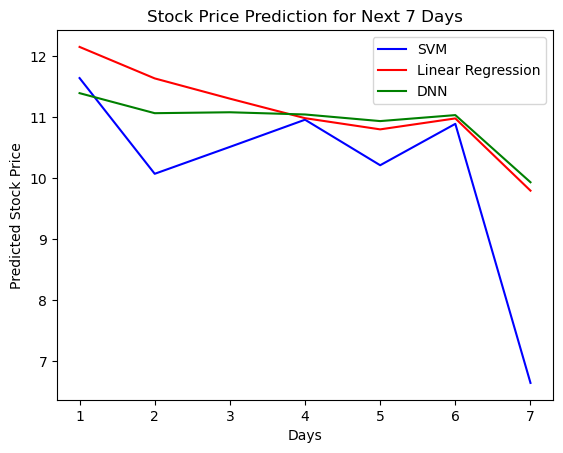

In [10]:
# Visualizing the comparision of the days

# Create a list of days
days = [1, 2, 3, 4, 5, 6, 7]

# Plot the data
plt.plot(days, svm_next7days, color='blue', label='SVM')
plt.plot(days, lr_next7days, color='red', label='Linear Regression')
plt.plot(days, dnn_next7days, color='green', label='DNN')

# Add labels and title
plt.xlabel('Days')
plt.ylabel('Predicted Stock Price')
plt.title('Stock Price Prediction for Next 7 Days')

# Add legend
plt.legend()

# Show the plot
plt.show()

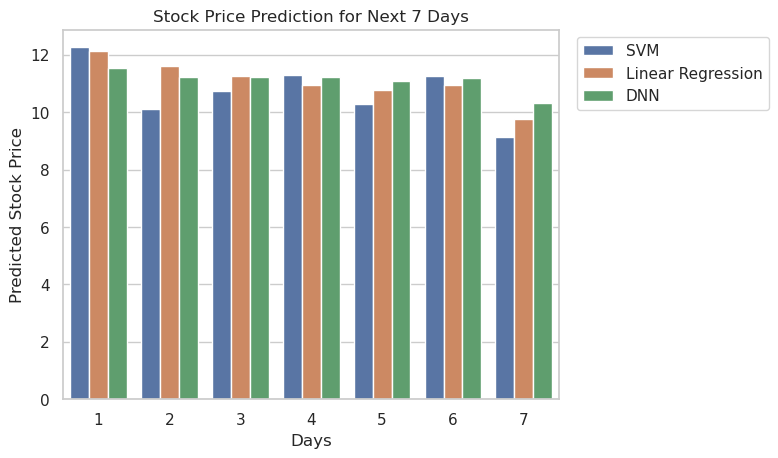

In [11]:
# Define the predicted values for SVM, Linear Regression, and DNN
svm_next7days = [12.25693225, 10.1123252, 10.7488707, 11.30425637, 10.27959834, 11.24091329, 9.13999752]
lr_next7days = [12.11145881, 11.59601589, 11.26758707, 10.94751006, 10.76198022, 10.94537396, 9.76628752]
dnn_next7days = [11.5351515, 11.206194, 11.2260275, 11.203941, 11.088118, 11.192676, 10.310493]

# Create a pandas dataframe with the predicted values
data = {'Days': [1, 2, 3, 4, 5, 6, 7],
        'SVM': svm_next7days,
        'Linear Regression': lr_next7days,
        'DNN': dnn_next7days}

df = pd.DataFrame(data)

# Reshape the data to create a "long" format for the barplot
df = df.melt(id_vars=['Days'], var_name='Algorithm', value_name='Predicted Stock Price')

# Create the barplot using Seaborn
sns.set(style="whitegrid")
ax = sns.barplot(x='Days', y='Predicted Stock Price', hue='Algorithm', data=df)

# Adjust the position of the legend
ax.legend(loc='upper left', bbox_to_anchor=(1.02, 1))

# Add a title
ax.set_title('Stock Price Prediction for Next 7 Days')

# Show the plot
plt.show()